# CONVOLUTIONAL NEURAL NETWORK (CNN) BASICS

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

==========

## Cats vs. Dogs | Convolutional Neural Network (CNN) Case-study

Data Source: https://www.kaggle.com/c/dogs-vs-cats

## Loading & Preparing Datasets

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

##### Training Data

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [4]:
training_set = train_datagen.flow_from_directory('datasets/cats-dogs/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [5]:
training_set.image_shape

(64, 64, 3)

In [6]:
training_set.classes

array([0, 0, 0, ..., 1, 1, 1])

##### Test Data

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
test_set = test_datagen.flow_from_directory('datasets/cats-dogs/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Exploring Data

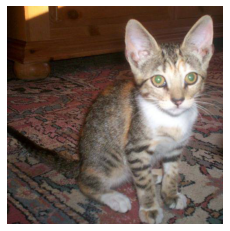

In [13]:
import matplotlib.image as mpimg
img = mpimg.imread('datasets/cats-dogs/train/cats/' + 'cat.7.jpg')
plt.imshow(img)
plt.axis("off");

In [14]:
img.shape

(499, 495, 3)

## Model Building

In [15]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [17]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Model Training

In [18]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 41s 161ms/step - loss: 0.6798 - accuracy: 0.5706 - val_loss: 0.6252 - val_accuracy: 0.6565
Epoch 2/25
250/250 [==============================] - 33s 134ms/step - loss: 0.6242 - accuracy: 0.6557 - val_loss: 0.5791 - val_accuracy: 0.7020
Epoch 3/25
250/250 [==============================] - 37s 149ms/step - loss: 0.5877 - accuracy: 0.6909 - val_loss: 0.6493 - val_accuracy: 0.6540
Epoch 4/25
250/250 [==============================] - 40s 158ms/step - loss: 0.5511 - accuracy: 0.7151 - val_loss: 0.5237 - val_accuracy: 0.7550
Epoch 5/25
250/250 [==============================] - 35s 139ms/step - loss: 0.5149 - accuracy: 0.7429 - val_loss: 0.5373 - val_accuracy: 0.7375
Epoch 6/25
250/250 [==============================] - 35s 139ms/step - loss: 0.5028 - accuracy: 0.7548 - val_loss: 0.4958 - val_accuracy: 0.7700
Epoch 7/25
250/250 [==============================] - 33s 132ms/step - loss: 0.4716 - accuracy: 0.7754 - val_loss: 0.5361 - val_ac

## Model Saving

In [19]:
cnn.save('cats-dogs.h5')

## Model Evalution & Testing

In [20]:
model = tf.keras.models.load_model('cats-dogs-model.h5')

##### Making a Single Prediction

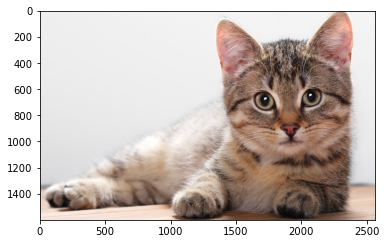

In [28]:
test_img = mpimg.imread('datasets/cats-dogs/single_prediction/cat_or_dog_2.jpg')
plt.imshow(test_img)

In [30]:
test_img = tf.keras.utils.load_img('datasets/cats-dogs/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))

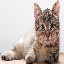

In [31]:
test_img

In [32]:
test_img = tf.keras.utils.img_to_array(test_img)

In [33]:
test_img

array([[[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [245., 245., 245.],
        [245., 245., 245.],
        [245., 245., 245.]],

       [[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [245., 245., 245.],
        [245., 245., 245.],
        [244., 244., 244.]],

       [[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [244., 244., 244.],
        [244., 244., 244.],
        [244., 244., 244.]],

       ...,

       [[241., 217., 205.],
        [243., 220., 206.],
        [241., 219., 205.],
        ...,
        [227., 200., 181.],
        [233., 205., 191.],
        [232., 215., 197.]],

       [[255., 237., 227.],
        [251., 234., 227.],
        [252., 235., 227.],
        ...,
        [219., 193., 178.],
        [219., 193., 180.],
        [216., 189., 172.]],

       [[243., 230., 222.],
        [250., 235., 228.],
        [246., 2

In [34]:
test_img = np.expand_dims(test_img, axis = 0)

In [35]:
model.predict(test_img)

1/1 [==============================] - 0s 30ms/step


array([[1.]], dtype=float32)

==========

# THANK YOU!